In [1]:
import numpy as np
import pandas as pd
import glob
import os

In [2]:
#defines function that takes a string in the form of "1kmN3170E4070" and and integer d for the degree of 1km-neighbours 
#and returns a list made of d lists, each containing neighbors of d-th degree

def return_neighbor_cells(name, d):
    C_North = int(name[4:8])
    C_East = int(name[9:13])
    
#top-level iteration; one for every degree of neighbor, each returns one list of neighbors
    j = 1
    neighbors = []
    while j < d+1:
        neighbors_d = []

        #move to northern center neighbor of d-th degree
        temp_cell = "1kmN"+str(C_North+j)+"E"+str(C_East)
        neighbors_d.append(temp_cell)

        #move towards the top right corner and append list on the way
        i = 1
        while i < j+1:
            temp_cell = "1kmN"+str(C_North+j)+"E"+str(C_East+i)
            neighbors_d.append(temp_cell)
            i = i+1

        #move towards the bottom right corner and append the list on the way
        i = 1
        while i < j*2+1:
            temp_cell = "1kmN"+str(C_North+j-i)+"E"+str(C_East+j)
            neighbors_d.append(temp_cell)
            i = i+1

        #move towards the bottom left corner and append list on the way
        i = 1
        while i < j*2+1:
            temp_cell = "1kmN"+str(C_North-j)+"E"+str(C_East+j-i)
            neighbors_d.append(temp_cell)
            i = i+1

        #move towards the top left corner and append list on the way
        i = 1
        while i < j*2+1:
            temp_cell = "1kmN"+str(C_North+i-j)+"E"+str(C_East-j)
            neighbors_d.append(temp_cell)
            i = i+1    

        #move towards the top centre neighbor of d-th degree and append list on the way
        i = 1
        while i < j:
            temp_cell = "1kmN"+str(C_North+j)+"E"+str(C_East-j+i)
            neighbors_d.append(temp_cell)
            i = i+1            
        
        j = j+1
        neighbors.append(neighbors_d)
        
    return neighbors

In [4]:
#test
#return_neighbor_cells("1kmN3222E4201", 4)

In [5]:
#populate dataframe with grid cell names, neighbours, and av elevation for single grid cell

#this file was proided by Jan Kuchhäuser, Chair of Freight Transport Planning and Transport Logistics, University of Wuppertal
gridcells = pd.read_csv('C:/Users/arning/sciebo/04_Research/02_Current projects/2023_04_PLUG-IN/03_Data GUT/1km_Gitterzellen_Steigung.csv')

#rename id column to name
gridcells = gridcells.rename(columns={"id": "cellname"})
df = gridcells[0:0]

#print(gridcells)

for index, row in gridcells.iterrows():
    
    #APPLIES THE return_neighbors FUNCTION TO THE NAME OF THE GRID CELL
    #AND STORES THE RESULTING 2D-LIST IN THE df
    temp_neighbors = return_neighbor_cells(row['cellname'], 4)    
    temp_df = pd.DataFrame([[row['cellname'], temp_neighbors, 0.0]], columns=['cellname', 'neighbors','elevar'])
    
    df = pd.concat([df, temp_df])

df = df.tail(-1)

#add s_mean_gew from dataframe "gridcells" to dataframe "df" using column "cellname" as index
df['s_mean_gew'] = df['cellname'].map(gridcells.set_index('cellname')['s_mean_gew'])

pd.set_option('display.max_colwidth', None)
display(df)


,fid,cellname,rowid,featuretype_name,dataset_name,objectid,x_sw,y_sw,x_mp,y_mp,...,s_median,s_quartil3,s_max,sx100_var,count_kanten_n,count_kanten_ges,s_mean_gew,s_quartil90,neighbors,elevar
0,NaN,1kmN3222E4202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0269,NaN,"[[1kmN3223E4202, 1kmN3223E4203, 1kmN3222E4203, 1kmN3221E4203, 1kmN3221E4202, 1kmN3221E4201, 1kmN3222E4201, 1kmN3223E4201], [1kmN3224E4202, 1kmN3224E4203, 1kmN3224E4204, 1kmN3223E4204, 1kmN3222E4204, 1kmN3221E4204, 1kmN3220E4204, 1kmN3220E4203, 1kmN3220E4202, 1kmN3220E4201, 1kmN3220E4200, 1kmN3221E4200, 1kmN3222E4200, 1kmN3223E4200, 1kmN3224E4200, 1kmN3224E4201], [1kmN3225E4202, 1kmN3225E4203, 1kmN3225E4204, 1kmN3225E4205, 1kmN3224E4205, 1kmN3223E4205, 1kmN3222E4205, 1kmN3221E4205, 1kmN3220E4205, 1kmN3219E4205, 1kmN3219E4204, 1kmN3219E4203, 1kmN3219E4202, 1kmN3219E4201, 1kmN3219E4200, 1kmN3219E4199, 1kmN3220E4199, 1kmN3221E4199, 1kmN3222E4199, 1kmN3223E4199, 1kmN3224E4199, 1kmN3225E4199, 1kmN3225E4200, 1kmN3225E4201], [1kmN3226E4202, 1kmN3226E4203, 1kmN3226E4204, 1kmN3226E4205, 1kmN3226E4206, 1kmN3225E4206, 1kmN3224E4206, 1kmN3223E4206, 1kmN3222E4206, 1kmN3221E4206, 1kmN3220E4206, 1kmN3219E4206, 1kmN3218E4206, 1kmN3218E4205, 1kmN3218E4204, 1kmN3218E4203, 1kmN3218E4202, 1kmN3218E4201, 1kmN3218E4200, 1kmN3218E4199, 1kmN3218E4198, 1kmN3219E4198, 1kmN3220E4198, 1kmN3221E4198, 1kmN3222E4198, 1kmN3223E4198, 1kmN3224E4198, 1kmN3225E4198, 1kmN3226E4198, 1kmN3226E4199, 1kmN3226E4200, 1kmN3226E4201]]",0.0
0,NaN,1kmN3222E4203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0508,NaN,"[[1kmN3223E4203, 1kmN3223E4204, 1kmN3222E4204, 1kmN3221E4204, 1kmN3221E4203, 1kmN3221E4202, 1kmN3222E4202, 1kmN3223E4202], [1kmN3224E4203, 1kmN3224E4204, 1kmN3224E4205, 1kmN3223E4205, 1kmN3222E4205, 1kmN3221E4205, 1kmN3220E4205, 1kmN3220E4204, 1kmN3220E4203, 1kmN3220E4202, 1kmN3220E4201, 1kmN3221E4201, 1kmN3222E4201, 1kmN3223E4201, 1kmN3224E4201, 1kmN3224E4202], [1kmN3225E4203, 1kmN3225E4204, 1kmN3225E4205, 1kmN3225E4206, 1kmN3224E4206, 1kmN3223E4206, 1kmN3222E4206, 1kmN3221E4206, 1kmN3220E4206, 1kmN3219E4206, 1kmN3219E4205, 1kmN3219E4204, 1kmN3219E4203, 1kmN3219E4202, 1kmN3219E4201, 1kmN3219E4200, 1kmN3220E4200, 1kmN3221E4200, 1kmN3222E4200, 1kmN3223E4200, 1kmN3224E4200, 1kmN3225E4200, 1kmN3225E4201, 1kmN3225E4202], [1kmN3226E4203, 1kmN3226E4204, 1kmN3226E4205, 1kmN3226E4206, 1kmN3226E4207, 1kmN3225E4207, 1kmN3224E4207, 1kmN3223E4207, 1kmN3222E4207, 1kmN3221E4207, 1kmN3220E4207, 1kmN3219E4207, 1kmN3218E4207, 1kmN3218E4206, 1kmN3218E4205, 1kmN3218E4204, 1kmN3218E4203, 1kmN3218E4202, 1kmN3218E4201, 1kmN3218E4200, 1kmN3218E4199, 1kmN3219E4199, 1kmN3220E4199, 1kmN3221E4199, 1kmN3222E4199, 1kmN3223E4199, 1kmN3224E4199, 1kmN3225E4199, 1kmN3226E4199, 1kmN3226E4200, 1kmN3226E4201, 1kmN3226E4202]]",0.0
0,NaN,1kmN3222E4204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0225,NaN,"[[1kmN3223E4204, 1kmN3223E4205, 1kmN3222E4205, 1kmN3221E4205, 1kmN3221E4204, 1kmN3221E4203, 1kmN3222E4203, 1kmN3223E4203], [1kmN3224E4204, 1kmN3224E4205, 1kmN3224E4206, 1kmN3223E4206, 1kmN3222E4206, 1kmN3221E4206, 1kmN3220E4206, 1kmN3220E4205, 1kmN3220E4204, 1kmN3220E4203, 1kmN3220E4202, 1kmN3221E4202, 1kmN3222E4202, 1kmN3223E4202, 1kmN3224E4202, 1kmN3224E4203], [1kmN3225E4204, 1kmN3225E4205, 1kmN3225E4206, 1kmN3225E4207, 1kmN3224E4207, 1kmN3223E4207, 1kmN3222E4207, 1kmN3221E4207, 1kmN3220E4207, 1kmN3219E4207, 1kmN3219E4206, 1kmN3219E4205, 1kmN3219E4204, 1kmN3219E4203, 1kmN3219E4202, 1kmN3219E4201, 1kmN3220E4201, 1kmN3221E4201, 1kmN3222E4201, 1kmN3223E4201, 1kmN3224E4201, 1kmN3225E4201, 1kmN3225E4202, 1kmN3225E4203], [1kmN3226E4204, 1kmN3226E4205, 1kmN3226E4206, 1kmN3226E4207, 1kmN3226E4208, 1kmN3225E4208, 1kmN3224E4208, 1kmN3223E4208, 1kmN3222E4208, 1kmN3221E4208, 1kmN3220E4208, 1kmN3219E4208, 1kmN3218E4208, 1kmN3218E4207, 1kmN3218E4206, 1kmN3218E4205, 1kmN3218E4204, 1kmN3218E4203, 1kmN3218E4202, 1kmN3218E4201, 1kmN3218E4200, 1kmN3219E4200, 1kmN3220E4200, 1kmN3221E4200, 1kmN3222E4200, 1k

In [6]:
#calculate elevar (weighted average of average elevation in neighbouring cells to d-th degree)
    
#d=1    
df['av_s_mean_gew_neighbors1'] = df.apply(lambda row: df[df['cellname'].isin(row['neighbors'][0])]['s_mean_gew'].mean(), axis=1)
    
#d=2
df['av_s_mean_gew_neighbors2'] = df.apply(lambda row: df[df['cellname'].isin(row['neighbors'][1])]['s_mean_gew'].mean(), axis=1)

#d=3
df['av_s_mean_gew_neighbors3'] = df.apply(lambda row: df[df['cellname'].isin(row['neighbors'][2])]['s_mean_gew'].mean(), axis=1)

#d=4
df['av_s_mean_gew_neighbors4'] = df.apply(lambda row: df[df['cellname'].isin(row['neighbors'][3])]['s_mean_gew'].mean(), axis=1)

#calculate elevar
df['elevar'] = df['s_mean_gew']*0.25 + df['av_s_mean_gew_neighbors1']*0.2 + df['av_s_mean_gew_neighbors2']*0.2 + df['av_s_mean_gew_neighbors3']*0.2 + df['av_s_mean_gew_neighbors4']*0.15
display(df)

,fid,cellname,rowid,featuretype_name,dataset_name,objectid,x_sw,y_sw,x_mp,y_mp,...,count_kanten_n,count_kanten_ges,s_mean_gew,s_quartil90,neighbors,elevar,av_s_mean_gew_neighbors1,av_s_mean_gew_neighbors2,av_s_mean_gew_neighbors3,av_s_mean_gew_neighbors4
0,NaN,1kmN3222E4202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0269,NaN,"[[1kmN3223E4202, 1kmN3223E4203, 1kmN3222E4203, 1kmN3221E4203, 1kmN3221E4202, 1kmN3221E4201, 1kmN3222E4201, 1kmN3223E4201], [1kmN3224E4202, 1kmN3224E4203, 1kmN3224E4204, 1kmN3223E4204, 1kmN3222E4204, 1kmN3221E4204, 1kmN3220E4204, 1kmN3220E4203, 1kmN3220E4202, 1kmN3220E4201, 1kmN3220E4200, 1kmN3221E4200, 1kmN3222E4200, 1kmN3223E4200, 1kmN3224E4200, 1kmN3224E4201], [1kmN3225E4202, 1kmN3225E4203, 1kmN3225E4204, 1kmN3225E4205, 1kmN3224E4205, 1kmN3223E4205, 1kmN3222E4205, 1kmN3221E4205, 1kmN3220E4205, 1kmN3219E4205, 1kmN3219E4204, 1kmN3219E4203, 1kmN3219E4202, 1kmN3219E4201, 1kmN3219E4200, 1kmN3219E4199, 1kmN3220E4199, 1kmN3221E4199, 1kmN3222E4199, 1kmN3223E4199, 1kmN3224E4199, 1kmN3225E4199, 1kmN3225E4200, 1kmN3225E4201], [1kmN3226E4202, 1kmN3226E4203, 1kmN3226E4204, 1kmN3226E4205, 1kmN3226E4206, 1kmN3225E4206, 1kmN3224E4206, 1kmN3223E4206, 1kmN3222E4206, 1kmN3221E4206, 1kmN3220E4206, 1kmN3219E4206, 1kmN3218E4206, 1kmN3218E4205, 1kmN3218E4204, 1kmN3218E4203, 1kmN3218E4202, 1kmN3218E4201, 1kmN3218E4200, 1kmN3218E4199, 1kmN3218E4198, 1kmN3219E4198, 1kmN3220E4198, 1kmN3221E4198, 1kmN3222E4198, 1kmN3223E4198, 1kmN3224E4198, 1kmN3225E4198, 1kmN3226E4198, 1kmN3226E4199, 1kmN3226E4200, 1kmN3226E4201]]",0.032236,0.045357,0.037056,0.030286,0.019809
0,NaN,1kmN3222E4203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0508,NaN,"[[1kmN3223E4203, 1kmN3223E4204, 1kmN3222E4204, 1kmN3221E4204, 1kmN3221E4203, 1kmN3221E4202, 1kmN3222E4202, 1kmN3223E4202], [1kmN3224E4203, 1kmN3224E4204, 1kmN3224E4205, 1kmN3223E4205, 1kmN3222E4205, 1kmN3221E4205, 1kmN3220E4205, 1kmN3220E4204, 1kmN3220E4203, 1kmN3220E4202, 1kmN3220E4201, 1kmN3221E4201, 1kmN3222E4201, 1kmN3223E4201, 1kmN3224E4201, 1kmN3224E4202], [1kmN3225E4203, 1kmN3225E4204, 1kmN3225E4205, 1kmN3225E4206, 1kmN3224E4206, 1kmN3223E4206, 1kmN3222E4206, 1kmN3221E4206, 1kmN3220E4206, 1kmN3219E4206, 1kmN3219E4205, 1kmN3219E4204, 1kmN3219E4203, 1kmN3219E4202, 1kmN3219E4201, 1kmN3219E4200, 1kmN3220E4200, 1kmN3221E4200, 1kmN3222E4200, 1kmN3223E4200, 1kmN3224E4200, 1kmN3225E4200, 1kmN3225E4201, 1kmN3225E4202], [1kmN3226E4203, 1kmN3226E4204, 1kmN3226E4205, 1kmN3226E4206, 1kmN3226E4207, 1kmN3225E4207, 1kmN3224E4207, 1kmN3223E4207, 1kmN3222E4207, 1kmN3221E4207, 1kmN3220E4207, 1kmN3219E4207, 1kmN3218E4207, 1kmN3218E4206, 1kmN3218E4205, 1kmN3218E4204, 1kmN3218E4203, 1kmN3218E4202, 1kmN3218E4201, 1kmN3218E4200, 1kmN3218E4199, 1kmN3219E4199, 1kmN3220E4199, 1kmN3221E4199, 1kmN3222E4199, 1kmN3223E4199, 1kmN3224E4199, 1kmN3225E4199, 1kmN3226E4199, 1kmN3226E4200, 1kmN3226E4201, 1kmN3226E4202]]",0.039095,0.043675,0.040307,0.034174,0.018423
0,NaN,1kmN3222E4204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0225,NaN,"[[1kmN3223E4204, 1kmN3223E4205, 1kmN3222E4205, 1kmN3221E4205, 1kmN3221E4204, 1kmN3221E4203, 1kmN3222E4203, 1kmN3223E4203], [1kmN3224E4204, 1kmN3224E4205, 1kmN3224E4206, 1kmN3223E4206, 1kmN3222E4206, 1kmN3221E4206, 1kmN3220E4206, 1kmN3220E4205, 1kmN3220E4204, 1kmN3220E4203, 1kmN3220E4202, 1kmN3221E4202, 1kmN3222E4202, 1kmN3223E4202, 1kmN3224E4202, 1kmN3224E4203], [1kmN3225E4204, 1kmN3225E4205, 1kmN3225E4206, 1kmN3225E4207, 1kmN3224E4207, 1kmN3223E4207, 1kmN3222E4207, 1kmN3221E4207, 1kmN3220E4207, 1kmN3219E4207, 1kmN3219E4206, 1kmN3219E4205, 1kmN3219E4204, 1kmN3219E4203, 1kmN3219E4202, 1kmN3219E4201, 1kmN3220E4201, 1kmN3221E4201, 1kmN3222E4201, 1kmN3223E4201, 1kmN3224E4201, 1kmN3225E4201, 1kmN3225E4202, 1kmN3225E4203], [1kmN3226E4204, 1kmN3226E4205, 1kmN3226E4206, 1kmN3226E4207, 1kmN3226E4208, 1kmN3225E4208, 1kmN3224E4208, 1kmN3223E4208, 1kmN3222E4208, 1kmN3221E4208, 1kmN3220E4208, 1kmN3219E4208, 1kmN3218E4208, 1kmN3218E4207, 1kmN3218E4206, 1kmN3218E4205, 1kmN3218E4204, 1kmN3218E4203, 1kmN3218E

In [6]:
#save elevar attribute into csv
df.to_csv('elevar.csv', columns = ['cellname','neighbors','elevar', 's_mean_gew'])

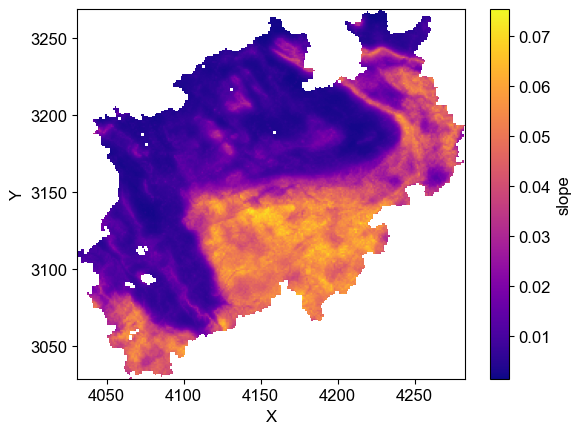

In [3]:
#map
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('elevar.csv')
df['x']='0'
df['y']='0'

for index, row in df.iterrows():
    df.at[index, 'x'] = int(row['cellname'][9:13])
    df.at[index, 'y'] = int(row['cellname'][4:8])
    
df = df[['x', 'y', 'elevar']]

df['x'] = pd.to_numeric(df['x'])
df['y'] = pd.to_numeric(df['y'])

heatmap_data = df.pivot(index='y', columns='x', values='elevar')

# Create the heatmap using imshow
plt.rc('font', family='Arial', size=12)
plt.imshow(heatmap_data, cmap='plasma', origin='lower', extent=[min(df['x']), max(df['x']), min(df['y']), max(df['y'])])
plt.colorbar(label='slope')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig("elevar_NRW.svg", format='svg')
plt.show()